In [1]:
import torch
import torch.nn as nn
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
import matplotlib.pyplot as plt
import time

2024-04-28 14:39:20.640548: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-28 14:39:20.670206: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-28 14:39:21.149893: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/tmp/ipykernel_260847/1017355598.py:7: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [2]:
print(len(tf.config.experimental.list_physical_devices('GPU')))

2


2024-04-28 14:39:48.440876: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-28 14:39:48.440981: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-28 14:39:48.441678: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [3]:
#use GPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [4]:
# a simple model
net = nn.Sequential(
    nn.Linear(20,100),
    nn.ReLU(),
    nn.Linear(100,500),
    nn.ReLU(),
    nn.Linear(500,30),
    nn.ReLU(),
    nn.Linear(30,2)
      )

In [5]:
# just some random fluff
data   = torch.randn((1000,20)) # samples X features
labels = torch.randint(low=0,high=2,size=(1,1000))

In [6]:
# send model and data to the GPU
net.to(device)
# model
net.to(device)

# data
data   = data.to(device)
labels = labels.to(device)

In [7]:
data

tensor([[-0.7124,  0.9640,  0.2052,  ...,  1.1195, -0.7786, -0.6774],
        [-1.4147,  0.1988, -0.6422,  ..., -0.4605,  0.6659, -0.1544],
        [ 1.1342, -0.3360,  0.9331,  ..., -0.8751,  0.6431, -1.4837],
        ...,
        [-1.0037, -1.5526,  0.1939,  ...,  0.9472,  0.3652, -1.9737],
        [ 0.3127,  0.4402, -1.6629,  ..., -1.8190, -0.4251, -0.1274],
        [ 0.5802,  1.3669, -0.1171,  ...,  1.0563,  1.2197,  1.0298]],
       device='cuda:0')

In [8]:
# you can also create data directly on the GPU
dataG = torch.randn((1000,20),device=device)
dataC = torch.randn((1000,20),device='cpu')

print(data.device)
print(dataG.device)
print(dataC.device)

cuda:0
cuda:0
cpu


In [9]:
output = net(data)

In [10]:
output.device

device(type='cuda', index=0)

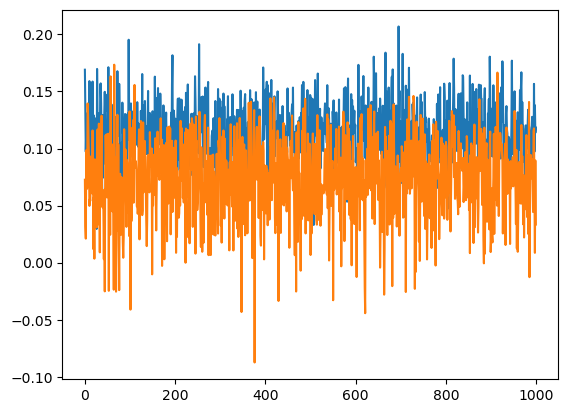

In [11]:
# try to plot the data
# plt.plot(output.detach()); # can't because gpu don't support this function

plt.plot(output.detach().cpu().squeeze().numpy())